In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

from thztoolsPY.noisefitshow import noisefitshow
from thztoolsPY.airscancorrect import airscancorrect
from thztoolsPY.tdtf import tdtf
from thztoolsPY.shiftmtx import shiftmtx

C:\Users\jonap\anaconda3\envs\thztools1\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read the data from matlab

file = h5py.File('dataToptica.mat', 'r')

t = np.squeeze(np.array(file['dataToptica']['t']))

# 50 ps, 2 avg
x2 = np.transpose(np.array(file['dataToptica']['X2']))
a2 = np.array(file['dataToptica']['A2'])
mu2 = np.array(file['dataToptica']['mu2'])
v2 = np.array(file['dataToptica']['v2'])
eta2 = np.array(file['dataToptica']['eta2'])
xadjusted_matlab2 = np.array(file['dataToptica']['Xadjusted2'])
sigmatotstar_matlab2 = np.array(file['dataToptica']['sigmaTotstar2'])

# 50 ps, 100 avg
x1 = np.transpose(np.array(file['dataToptica']['X1']))
a1 = np.array(file['dataToptica']['A1'])
mu1 = np.array(file['dataToptica']['mu1'])
v1 = np.array(file['dataToptica']['v1'])
eta1 = np.array(file['dataToptica']['eta1'])
xadjusted_matlab1 = np.array(file['dataToptica']['Xadjusted1'])
sigmatotstar_matlab1 = np.array(file['dataToptica']['sigmaTotstar1'])

In [9]:
v2

array([[3.35883662e-03, 4.32492428e-07, 2.67337281e-08]])

In [11]:
d1['p']['var']

array([3.37049178e-03, 2.36294822e-16, 5.59269955e-08])

array([0.003458  , 0.99987168, 0.99999207])

Fit for Delay
Optimization terminated successfully.
         Current function value: -52675.755375
         Iterations: 70
         Function evaluations: 299
         Gradient evaluations: 299
Elapsed time is 16.01835322380066
Fit for Amplitude
         Current function value: -47599.091999
         Iterations: 12
         Function evaluations: 49
         Gradient evaluations: 49
Hessian returned by FMINUNC is not positive definite;
recalculating with quasi-Newton algorithm
         Current function value: -47599.092535
         Iterations: 2
         Function evaluations: 56
         Gradient evaluations: 45
Elapsed time is 18.01502275466919
Adjust x
Fit for variance
Optimization terminated successfully.
         Current function value: -68739.662713
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Elapsed time is 18.901442050933838
Fit for all parameters
         Current function value: -69093.505847
         Iterations: 279
         Functi

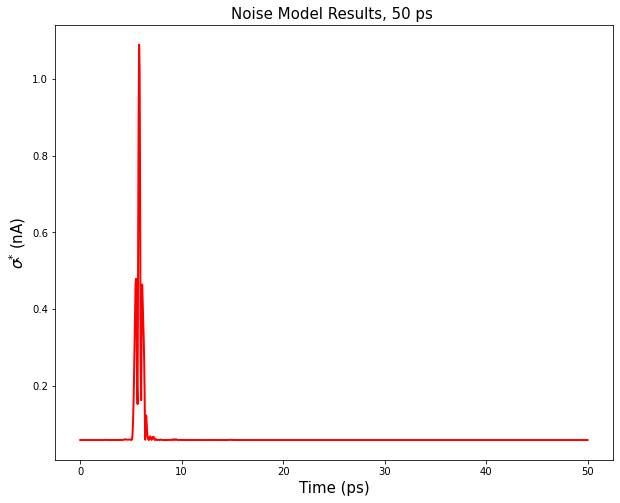

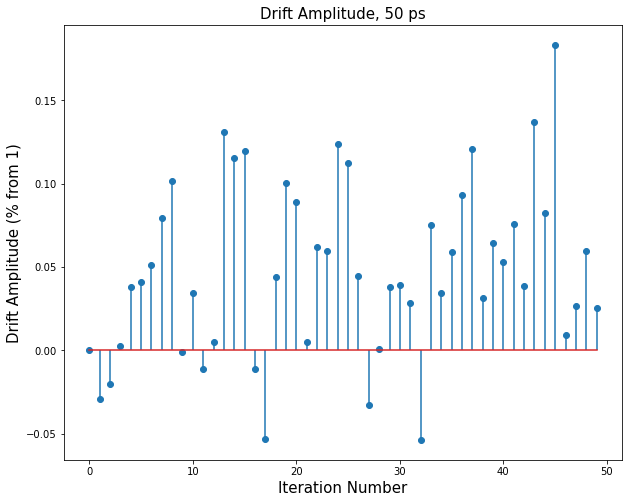

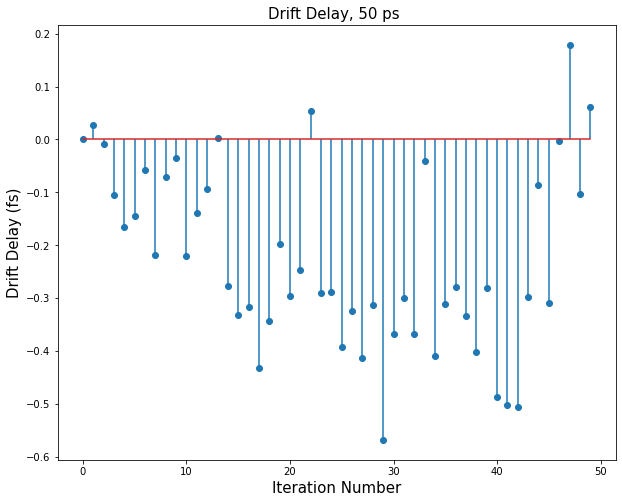

In [3]:
d1 = noisefitshow(t, x2)

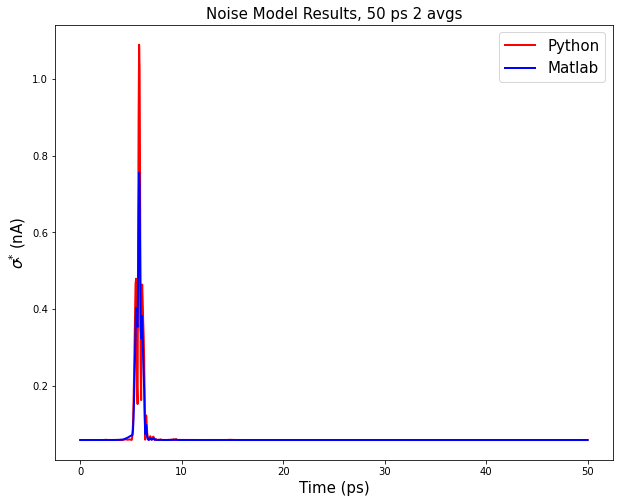

In [6]:
plt.figure(figsize=(10, 8))
plt.title('Noise Model Results, 50 ps 2 avgs', fontsize=15)
# python
plt.plot(t, d1['sigmatotstar'], color = 'red', label = 'Python', linewidth=2)
#plt.plot(t, np.std(d1['xadjusted'], 1), color = 'red', label = 'Python')


# matlab
plt.plot(t, np.squeeze(sigmatotstar_matlab2.T), color = 'blue', label = 'Matlab', linewidth=2)
#plt.plot(t, np.std(xadjusted_matlab2.T, 1),  color = 'yellow')

plt.xlabel('Time (ps)', fontsize=15)
plt.ylabel('$\sigma \hat{} ^{*}$ (nA)', fontsize=15)
plt.legend(fontsize=15)
plt.show()

For 100 avgs:


Fit for Delay
Optimization terminated successfully.
         Current function value: 95766.679339
         Iterations: 79
         Function evaluations: 272
         Gradient evaluations: 272
Elapsed time is 9.215632677078247
Fit for Amplitude
         Current function value: 117314.178595
         Iterations: 46
         Function evaluations: 140
         Gradient evaluations: 140
Elapsed time is 11.577179193496704
Adjust x
Fit for variance
Optimization terminated successfully.
         Current function value: -97460.241786
         Iterations: 27
         Function evaluations: 46
         Gradient evaluations: 46
Elapsed time is 12.847280263900757
Fit for all parameters
         Current function value: -163366.264502
         Iterations: 1371
         Function evaluations: 1546
         Gradient evaluations: 1546
Elapsed time is 292.40885376930237


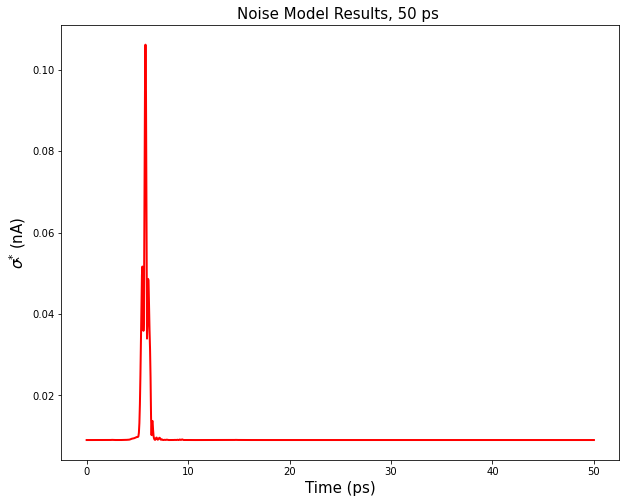

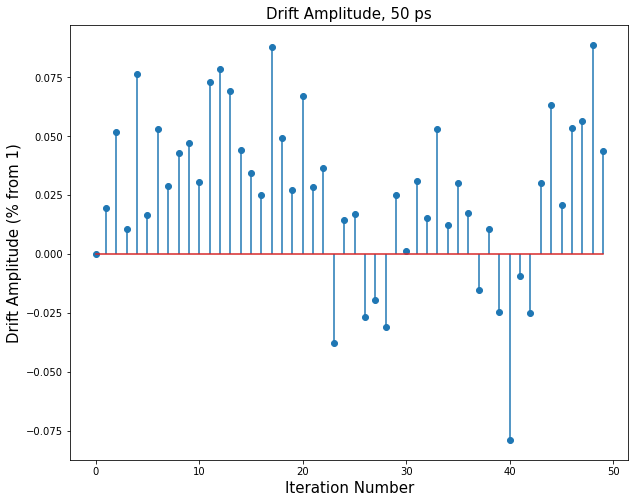

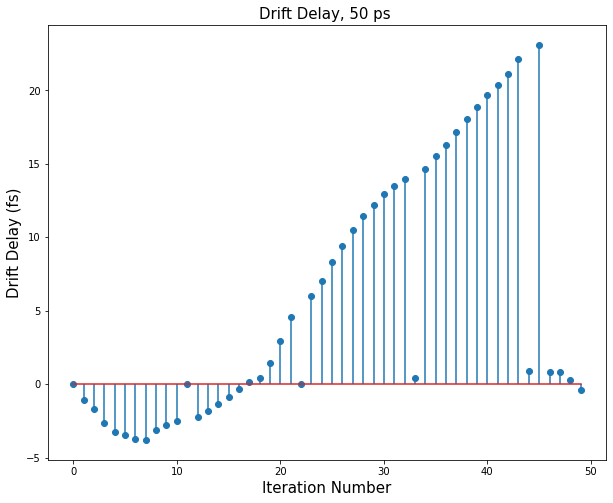

In [6]:
d2 = noisefitshow(t, x1)

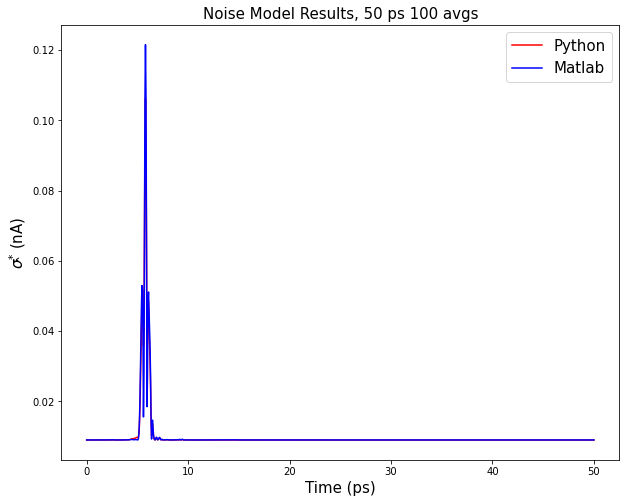

In [7]:
plt.figure(figsize=(10, 8))
plt.title('Noise Model Results, 50 ps 100 avgs', fontsize=15)
# python
plt.plot(t, d2['sigmatotstar'], color = 'red', label = 'Python')
#plt.plot(t, np.std(xadjusted, 1)/100, 'o', color = 'yellow')

# matlab
plt.plot(t, np.squeeze(sigmatotstar_matlab1.T), color = 'blue', label = 'Matlab')
#plt.plot(t, np.std(xadjusted_matlab1.T, 1), 'o', color = 'red')
plt.xlabel('Time (ps)', fontsize=15)
plt.ylabel('$\sigma \hat{} ^{*}$ (nA)', fontsize=15)
plt.legend(fontsize=15)
plt.show()